# Test of Preprocessing Methods

To test the performance of each method the method are compared in time complexity and accuracy.

In [48]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt

In [49]:
# Import data 
potato_fil = glob.glob('/mnt/sdb/Robtek/6semester/Bachelorproject/BSc-PRO/potato_and_catfood/train/potato/*.jpg')
potato_images = [cv2.imread(img) for img in potato_fil]

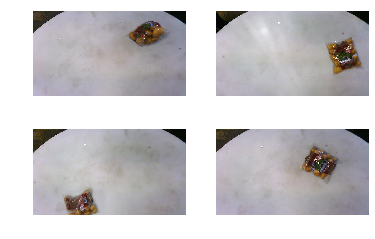

In [50]:
# Convert potato_image from BGR to RGB
potato_1 = cv2.cvtColor(potato_images[0], cv2.COLOR_BGR2RGB)
potato_2 = cv2.cvtColor(potato_images[78], cv2.COLOR_BGR2RGB)
potato_3 = cv2.cvtColor(potato_images[122], cv2.COLOR_BGR2RGB)
potato_4 = cv2.cvtColor(potato_images[145], cv2.COLOR_BGR2RGB)

# Plot images of potatoes
plt.figure(1)

# Potato 1
plt.subplot(221); plt.imshow(potato_1); plt.axis('off')

# Potato 2
plt.subplot(222); plt.imshow(potato_2); plt.axis('off')

# Potato 3
plt.subplot(223); plt.imshow(potato_3); plt.axis('off')

# Potato 4
plt.subplot(224); plt.imshow(potato_4); plt.axis('off')

plt.show()

## Time Complexity

To test the time complexity the OpenCV function [getTickCount() and getTickFrequency()](https://docs.opencv.org/3.4/db/de0/group__core__utils.html#gae73f58000611a1af25dd36d496bf4487) is used.

- getTickCount: returns the number of clock-cycles after a reference event to the moment this function is called.

- getTickFrequency: returns the frequency of clock-cycles, or the number of clock-cylces per second.

Example code:

```python
e1 = cv2.getTickCount()
# your code here
e2 = cv2.getTickCount()
time = (e2 - e1) / cv2.getTickFrequency()
```

### Background Models

In [51]:
from background_models import background_models as bm

# import background imageg
background_img = bm.run_avg('/mnt/sdb/Robtek/6semester/Bachelorproject/BSc-PRO/images_1280x720/baggrund/bevægelse')

list_bm = []
roi_bm = []
for img in potato_images:
    # Get number of clock-cycles
    e1 = cv2.getTickCount()
    roi = bm.background_sub(img, background_img)
    e2 = cv2.getTickCount()
    
    # Calculate time
    time = (e2 - e1) / cv2.getTickFrequency()
    
    # Add to list
    list_bm.append([e1, e2, e2-e1, time])
    roi_bm.append(roi)

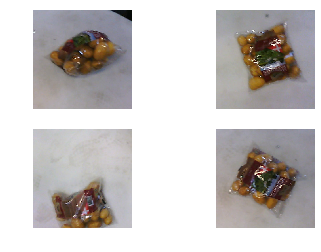

In [52]:
# Convert from RGB to BGR
bm_0 = cv2.cvtColor(roi_bm[0], cv2.COLOR_BGR2RGB)
bm_78 = cv2.cvtColor(roi_bm[78], cv2.COLOR_BGR2RGB)
bm_122 = cv2.cvtColor(roi_bm[122], cv2.COLOR_BGR2RGB)
bm_145 = cv2.cvtColor(roi_bm[145], cv2.COLOR_BGR2RGB)

# Plot images of potatoes
plt.figure(2)

# Potato 1
plt.subplot(221); plt.imshow(bm_0); plt.axis('off')

# Potato 2
plt.subplot(222); plt.imshow(bm_78); plt.axis('off')

# Potato 3
plt.subplot(223); plt.imshow(bm_122); plt.axis('off')

# Potato 4
plt.subplot(224); plt.imshow(bm_145); plt.axis('off')

plt.show()

### Template Matching

In [53]:
from template_matching import template_matching as tm

template = cv2.imread('/mnt/sdb/Robtek/6semester/Bachelorproject/BSc-PRO/preprocessing/template_matching/template_tm.jpg')

list_tm = []
roi_tm = []
for img in potato_images:
    # Get number of clock-cycles
    e1 = cv2.getTickCount()
    roi = tm.template_matching(template, img)
    e2 = cv2.getTickCount()
    
    # Calculate time
    time = (e2 - e1) / cv2.getTickFrequency()
    
    # Add to list
    list_tm.append([e1, e2, e2-e1, time])
    roi_tm.append(roi)

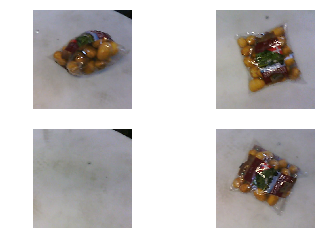

In [54]:
# Convert from RGB to BGR
tm_0 = cv2.cvtColor(roi_tm[0], cv2.COLOR_BGR2RGB)
tm_78 = cv2.cvtColor(roi_tm[78], cv2.COLOR_BGR2RGB)
tm_122 = cv2.cvtColor(roi_tm[122], cv2.COLOR_BGR2RGB)
tm_145 = cv2.cvtColor(roi_tm[145], cv2.COLOR_BGR2RGB)

# Plot images of potatoes
plt.figure(3)

# Potato 1
plt.subplot(221); plt.imshow(tm_0); plt.axis('off')

# Potato 2
plt.subplot(222); plt.imshow(tm_78); plt.axis('off')

# Potato 3
plt.subplot(223); plt.imshow(tm_122); plt.axis('off')

# Potato 4
plt.subplot(224); plt.imshow(tm_145); plt.axis('off')

plt.show()

### Back-projection

In [55]:
from backprojection import backprojection as bp

roi_img = cv2.imread('/mnt/sdb/Robtek/6semester/Bachelorproject/BSc-PRO/preprocessing/backprojection/template_bp.jpg', 1)
roi_hsv = cv2.cvtColor(roi_img, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([roi_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

list_bp = []
roi_bp = []
for img in potato_images:
    # Get number of clock-cycles
    e1 = cv2.getTickCount()
    roi = bp.backproject(roi_hist, img)
    roi = bp.get_item(roi, img)
    e2 = cv2.getTickCount()
    
    # Calculate time
    time = (e2 - e1) / cv2.getTickFrequency()
    
    # Add to list
    list_bp.append([e1, e2, e2-e1, time])
    roi_bp.append(roi)

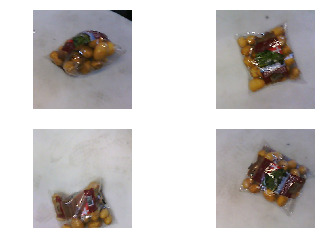

In [56]:
# Convert from RGB to BGR
bp_0 = cv2.cvtColor(roi_bp[0], cv2.COLOR_BGR2RGB)
bp_78 = cv2.cvtColor(roi_bp[78], cv2.COLOR_BGR2RGB)
bp_122 = cv2.cvtColor(roi_bp[122], cv2.COLOR_BGR2RGB)
bp_145 = cv2.cvtColor(roi_bp[145], cv2.COLOR_BGR2RGB)

# Plot images of potatoes
plt.figure(4)

# Potato 1
plt.subplot(221); plt.imshow(bp_0); plt.axis('off')

# Potato 2
plt.subplot(222); plt.imshow(bp_78); plt.axis('off')

# Potato 3
plt.subplot(223); plt.imshow(bp_122); plt.axis('off')

# Potato 4
plt.subplot(224); plt.imshow(bp_145); plt.axis('off')

plt.show()

### Comparison

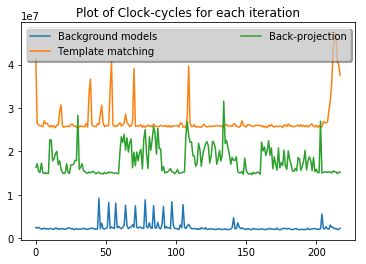

In [62]:
# Plot number of clock-cycles
plt.figure(5)
plt.title('Plot of Clock-cycles for each iteration')

# Background models
i = 0; x_bm = []; y_bm = []
for l in list_bm:
    x_bm.append(i); i += 1
    y_bm.append(l[2])
plt.plot(x_bm, y_bm, label='Background models')

# Template matching
i = 0; x_tm = []; y_tm = []
for l in list_tm:
    x_tm.append(i); i += 1
    y_tm.append(l[2])
plt.plot(x_tm, y_tm, label='Template matching')

# Back-projection
i = 0; x_bp = []; y_bp = []
for l in list_bp:
    x_bp.append(i); i += 1
    y_bp.append(l[2])
plt.plot(x_bp, y_bp, label='Back-projection')

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

In [64]:
print('Background models: ', list_bm[0][3])
print('Template matching: ', list_tm[0][3])
print('Back-projection: ', list_bp[0][3])

Background models:  0.00246899
Template matching:  0.04118914
Back-projection:  0.016312121
